In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
data = pd.read_csv('1.01.+Simple+linear+regression.csv')
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [61]:
x = data['SAT']  #input or feature
y = data['GPA']  #output or target

In [62]:
x.shape 

(84,)

In [63]:
y.shape # we see both are vectors of same variable

(84,)

In [64]:
#converting it to 2d as sklearn works with 2d arrays
#changing the object from 1d to 2d
#generally the issue arises when you use only one feature as in simple linear regression, but not otherwise
#because in those cases you have dozens of features to work with (like multiple linear regression)
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

In [65]:
reg = LinearRegression()

In [66]:
reg.fit(x_matrix,y) #(input,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

R-squared

In [67]:
reg.score(x_matrix,y)

0.40600391479679765

Coefficients

In [68]:
reg.coef_ #b1 |||| When we do multiple reg then this will return an array with all coefficients

array([0.00165569])

Intercepts

In [69]:
reg.intercept_ #We get a single float value as the intercept remains single valued in these type of regressions

0.2750402996602803

Making Predictions

In [70]:
reg.predict([[1740]])

array([3.15593751])

In [71]:
new_data = pd.DataFrame(data=[1740,1700],columns=['SAT'])
new_data

,SAT
0,1740
1,1700


In [72]:
reg.predict(new_data)

array([3.15593751, 3.08970998])

In [74]:
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1700,3.089710


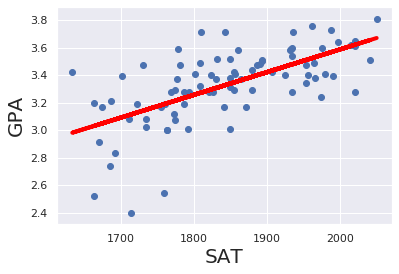

In [81]:
plt.scatter(x,y)
yhat = reg.coef_ * x_matrix + reg.intercept_
fig = plt.plot(x,yhat,lw=4,c='red',label = 'regression line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()